Custom Seed with Watershed Algorithm

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
road = cv2.imread('road_images.png')
road_copy = np.copy(road)

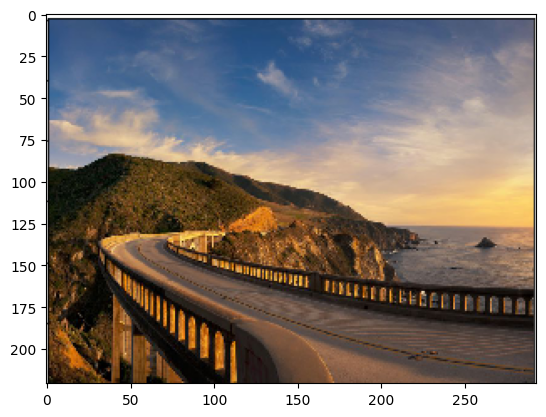

In [3]:
plt.imshow(road)

Create an empty space for the result to be drawn

In [4]:
road.shape

(221, 293, 3)

In [5]:
road.shape[:2]

(221, 293)

In [6]:
marker_image = np.zeros(road.shape[:2], dtype=np.int32)

In [7]:
segments = np.zeros(road.shape, dtype=np.uint8)

In [8]:
segments.shape

(221, 293, 3)

Create color for Markers

In [9]:
from matplotlib import cm

In [10]:
cm.tab10(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [11]:
cm.tab10(1)

(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)

In [12]:
np.array(cm.tab10(0))

array([0.12156863, 0.46666667, 0.70588235, 1.        ])

In [13]:
np.array(cm.tab10(0))[:3]

array([0.12156863, 0.46666667, 0.70588235])

In [14]:
np.array(cm.tab10(0))[:3]*255

array([ 31., 119., 180.])

In [15]:
x = np.array(cm.tab10(0))[:3]*255

In [16]:
x.astype(int)

array([ 31, 119, 180])

In [17]:
tuple(x.astype(int))

(31, 119, 180)

In [18]:
# Lets make a function all those topics 
def create_rgb(i):
    x = np.array(cm.tab10(i))[:3]*255
    return x

In [19]:
colors = []

In [20]:
# One color for each single digits
for i in range(10):
    colors.append(create_rgb(i))

In [21]:
colors

[array([ 31., 119., 180.]),
 array([255., 127.,  14.]),
 array([ 44., 160.,  44.]),
 array([214.,  39.,  40.]),
 array([148., 103., 189.]),
 array([140.,  86.,  75.]),
 array([227., 119., 194.]),
 array([127., 127., 127.]),
 array([188., 189.,  34.]),
 array([ 23., 190., 207.])]

Setting Up Callback function

In [22]:
colors

[array([ 31., 119., 180.]),
 array([255., 127.,  14.]),
 array([ 44., 160.,  44.]),
 array([214.,  39.,  40.]),
 array([148., 103., 189.]),
 array([140.,  86.,  75.]),
 array([227., 119., 194.]),
 array([127., 127., 127.]),
 array([188., 189.,  34.]),
 array([ 23., 190., 207.])]

In [23]:
n_markers = 10

In [24]:
# Default settings
current_marker = 1
marks_updated = False

In [25]:
def mouse_callback(event, x, y, flags, param):
    global marks_updated

    if event == cv2.EVENT_FLAG_LBUTTON:

        # Tracking for markers
        cv2.circle(marker_image, (x, y), 10, (current_marker), -1)

        # Display  On users image 
        cv2.circle(road_copy, (x, y), 10, colors[current_marker], -1)
        marks_updated = True

In [26]:
cv2.namedWindow('Road Image')
cv2.setMouseCallback('Road Image', mouse_callback)

while True:
    
    # SHow the 2 windows
    cv2.imshow('WaterShed Segments', segments)
    cv2.imshow('Road Image', road_copy)
        
        
    # Close everything if Esc is pressed
    k = cv2.waitKey(1)

    if k == 27:
        break
        
    # Clear all colors and start over if 'c' is pressed
    elif k == ord('c'):
        road_copy = road.copy()
        marker_image = np.zeros(road.shape[0:2], dtype=np.int32)
        segments = np.zeros(road.shape,dtype=np.uint8)
        
    # If a number 0-9 is chosen index the color
    elif k > 0 and chr(k).isdigit():
        # chr converts to printable digit
        
        current_marker  = int(chr(k))
        
        # CODE TO CHECK INCASE USER IS CARELESS
#         n = int(chr(k))
#         if 1 <= n <= n_markers:
#             current_marker = n
    
    # If we clicked somewhere, call the watershed algorithm on our chosen markers
    if marks_updated:
        
        marker_image_copy = marker_image.copy()
        cv2.watershed(road, marker_image_copy)
        
        segments = np.zeros(road.shape,dtype=np.uint8)
        
        for color_ind in range(n_markers):
            segments[marker_image_copy == (color_ind)] = colors[color_ind]
        
        marks_updated = False
        
cv2.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/cfdml-04/miniconda3/envs/myenv/lib/python3.12/site-packages/cv2/qt/plugins"
